<a href="https://colab.research.google.com/github/joohoshin/TensorflowAI/blob/main/11_3_%EC%9D%B4%EB%AF%B8%EC%A7%80_%ED%8C%8C%EC%9D%BC_%EC%9D%BD%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

꽃에 대한 이미지 파일입니다 .

https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz

In [1]:
import tensorflow as tf

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='flower_photos', 
                                   untar=True)

228818944/228813984 [==============================] - 18s 0us/step


In [2]:
data_dir

'C:\\Users\\Jae\\.keras\\datasets\\flower_photos'

In [3]:
!ls /root/.keras/datasets/flower_photos

'ls'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [4]:
!ls /root/.keras/datasets/flower_photos/roses

'ls'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [5]:
import glob

roses = list(glob.glob(data_dir+'/roses/*.*')) #폴더 내의 파일(경로포함) 가져오기

In [6]:
roses

['C:\\Users\\Jae\\.keras\\datasets\\flower_photos/roses\\10090824183_d02c613f10_m.jpg',
 'C:\\Users\\Jae\\.keras\\datasets\\flower_photos/roses\\102501987_3cdb8e5394_n.jpg',
 'C:\\Users\\Jae\\.keras\\datasets\\flower_photos/roses\\10503217854_e66a804309.jpg',
 'C:\\Users\\Jae\\.keras\\datasets\\flower_photos/roses\\10894627425_ec76bbc757_n.jpg',
 'C:\\Users\\Jae\\.keras\\datasets\\flower_photos/roses\\110472418_87b6a3aa98_m.jpg',
 'C:\\Users\\Jae\\.keras\\datasets\\flower_photos/roses\\11102341464_508d558dfc_n.jpg',
 'C:\\Users\\Jae\\.keras\\datasets\\flower_photos/roses\\11233672494_d8bf0a3dbf_n.jpg',
 'C:\\Users\\Jae\\.keras\\datasets\\flower_photos/roses\\11694025703_9a906fedc1_n.jpg',
 'C:\\Users\\Jae\\.keras\\datasets\\flower_photos/roses\\118974357_0faa23cce9_n.jpg',
 'C:\\Users\\Jae\\.keras\\datasets\\flower_photos/roses\\11944957684_2cc806276e.jpg',
 'C:\\Users\\Jae\\.keras\\datasets\\flower_photos/roses\\12045735155_42547ce4e9_n.jpg',
 'C:\\Users\\Jae\\.keras\\datasets\\flower

In [7]:
import cv2

img = cv2.imread(roses[1]) 

In [8]:
img

array([[[10, 16, 15],
        [17, 22, 21],
        [15, 17, 17],
        ...,
        [ 0,  2,  2],
        [ 0,  2,  2],
        [ 0,  1,  1]],

       [[15, 21, 20],
        [ 9, 14, 13],
        [ 4,  6,  6],
        ...,
        [ 0,  2,  2],
        [ 0,  2,  2],
        [ 0,  2,  2]],

       [[16, 22, 21],
        [ 7, 12, 11],
        [ 0,  5,  4],
        ...,
        [ 0,  2,  2],
        [ 0,  2,  2],
        [ 0,  2,  2]],

       ...,

       [[ 0,  2,  2],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  1,  1],
        [ 0,  2,  2],
        [ 0,  2,  2]],

       [[ 1,  3,  3],
        [ 0,  2,  2],
        [ 0,  2,  2],
        ...,
        [ 0,  2,  2],
        [ 0,  2,  2],
        [ 0,  2,  2]],

       [[ 3,  5,  5],
        [ 3,  5,  5],
        [ 4,  6,  6],
        ...,
        [ 0,  2,  2],
        [ 1,  3,  3],
        [ 1,  3,  3]]], dtype=uint8)

In [9]:
img.shape

(240, 320, 3)

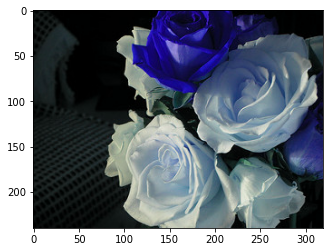

In [10]:
import matplotlib.pyplot as plt

plt.imshow(img)

In [11]:
img_height = 180
img_width = 180

옵션 참고

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory


In [12]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width))

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [13]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width))

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [14]:
type(train_ds)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [15]:
train_ds

<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

In [16]:
cnt = 0
for image_batch, labels_batch in train_ds:
    cnt +=1
    
    print(cnt)
    print(image_batch.shape)  
    print(labels_batch.shape)
    
    if cnt>= 3:
        break

1
(32, 180, 180, 3)
(32,)
2
(32, 180, 180, 3)
(32,)
3
(32, 180, 180, 3)
(32,)


In [17]:
class_names = train_ds.class_names

print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [18]:
cnt=0

for images, labels in train_ds.take(2):  #특정 데이터만 가져오기, batch_size가 기본 단위가 됨
    cnt +=1
    print(cnt)
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()

1
2


In [19]:
numpy_images.shape 

(32, 180, 180, 3)

In [20]:
numpy_images[0,:,:,0]

array([[ 92.34259 ,  50.955555,  58.66111 , ...,  33.68482 ,  42.355595,
         47.748615],
       [162.84305 ,  84.86249 ,  57.6125  , ...,  40.17635 ,  47.76262 ,
         52.23338 ],
       [204.32639 , 144.40277 ,  56.97916 , ...,  48.212864,  42.798615,
         31.513903],
       ...,
       [ 96.15707 ,  52.333374, 220.53282 , ..., 105.80344 , 102.867676,
         88.377205],
       [162.7674  ,  44.33758 , 141.42163 , ..., 115.01505 , 114.279205,
        102.80119 ],
       [117.88761 ,  73.94277 , 233.05457 , ..., 106.44923 , 101.40559 ,
         85.73027 ]], dtype=float32)

In [21]:
numpy_labels

array([2, 3, 1, 4, 4, 3, 1, 4, 1, 4, 1, 1, 3, 4, 0, 1, 1, 4, 4, 0, 3, 1,
       3, 2, 3, 0, 3, 1, 1, 3, 1, 4])

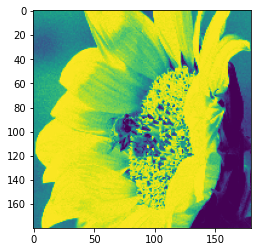

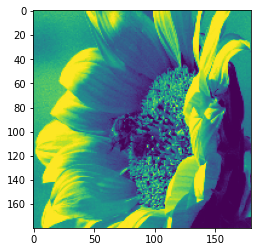

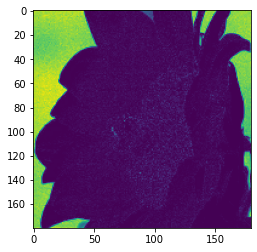

In [22]:
plt.figure()
plt.imshow(numpy_images[1,:,:,0]) #
plt.show()

plt.figure()
plt.imshow(numpy_images[1,:,:,1])
plt.show()

plt.figure()
plt.imshow(numpy_images[1,:,:,2])
plt.show()

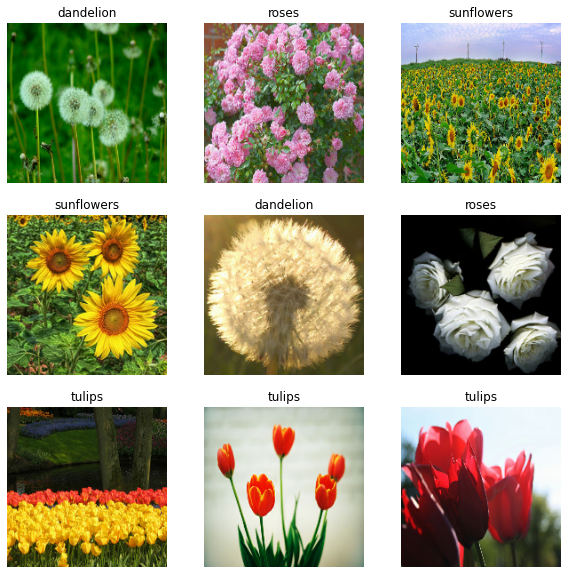

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('int'))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [24]:
from tensorflow.keras import layers

In [25]:
num_classes = 5

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [26]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [27]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
92/92 [==============================] - ETA: 0s - loss: 1.3332 - accuracy: 0.4186WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000251DC2630D8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) 

In [28]:
model.predict(val_ds)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


array([[ -6.8676195 ,  -6.6060224 ,   7.3257337 , -21.642315  ,
         23.023129  ],
       [ -1.768379  ,  -4.692747  ,   0.4333029 ,  -0.21439743,
          3.433975  ],
       [ -2.2383683 ,   3.5923629 ,   5.594726  ,   2.8054624 ,
          1.5207078 ],
       ...,
       [ -1.3762555 ,   3.3218372 ,  -2.2355678 ,  -3.4057226 ,
         12.532271  ],
       [ -6.556896  ,  -3.3607824 ,  -0.95744187,  12.709689  ,
          2.1382952 ],
       [ -6.6378365 ,  -0.846759  ,  16.661499  , -14.768419  ,
          9.718452  ]], dtype=float32)

Numpy로 가지고 있는 경우

In [29]:
img = numpy_images[:10,:,:,:]
pred_y=model.predict(img)

In [30]:
pred_y.shape

(10, 5)

In [31]:
pred_y

array([[  2.962536  ,  -9.766343  ,  17.320538  , -12.999774  ,
          8.937208  ],
       [ -9.513718  ,  -7.274353  ,   4.9066286 ,  11.740669  ,
          7.188195  ],
       [ -1.4003956 ,   4.6204    ,   0.11751106,   0.22741532,
          1.54141   ],
       [ -1.4110365 ,  -3.798012  ,  -0.32916   ,  -7.4508786 ,
          8.863224  ],
       [ -3.1292987 ,  -2.169286  ,   6.413266  , -14.8486185 ,
         13.04122   ],
       [ -5.6919727 ,  -4.7558846 ,  -1.6063249 ,  13.084324  ,
          2.452689  ],
       [ -6.215542  ,   9.083593  ,  -1.1145263 ,   7.7121987 ,
          0.36932668],
       [ -5.0603213 ,  -6.446418  ,   8.551199  ,  -7.968862  ,
         10.771471  ],
       [  5.6291437 ,  11.485737  ,  -5.061542  ,  -8.580885  ,
         -2.3829618 ],
       [ -0.4174884 ,  -1.5157539 ,   1.1877733 ,  -2.462045  ,
          4.8325973 ]], dtype=float32)

In [32]:
pred_labels = pred_y.argmax(axis=1)

In [33]:
pred_labels

array([2, 3, 1, 4, 4, 3, 1, 4, 1, 4], dtype=int64)

In [34]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


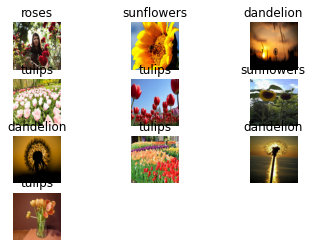

In [35]:
for i in range(10):
    ax = plt.subplot(4, 3, i + 1)
    plt.imshow(numpy_images[i].astype("int"))
    plt.title(class_names[pred_labels[i]])
    plt.axis("off")